In [1]:
!pip install pandas_ta
import pandas as pd
import pandas_ta as ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=dc3076a2b35b1bad659563efd8f9d84de3fc999eff61124001f59bb51a48216e
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [2]:
btc_data = pd.read_csv('/content/gemini_BTCUSD_2020_1min.csv', nrows=10000)
eth_data = pd.read_csv('/content/gemini_ETHUSD_2020_1min.csv', nrows=10000)
ltc_data = pd.read_csv('/content/gemini_LTCUSD_2020_1min.csv', nrows=10000)


In [3]:
import pandas as pd
import pandas_ta as ta

def generate_indicators(data):
    data['SMA5-20'] = ta.sma(data['Close'], length=5) - ta.sma(data['Close'], length=20)
    data['EMA5-20'] = ta.ema(data['Close'], length=5) - ta.ema(data['Close'], length=20)
    data['MACD'], _, _ = ta.macd(data['Close'])
    data['RSI'] = ta.rsi(data['Close'])
    data['ATR'] = ta.atr(data['High'], data['Low'], data['Close'])
    data['OBV'] = ta.obv(data['Close'], data['Volume'])
    data.dropna(inplace=True)

    return data
btc_data = generate_indicators(btc_data)
eth_data = generate_indicators(eth_data)
ltc_data = generate_indicators(ltc_data)

indicator_categories = {
    'Open': 'Candlestick',
    'High': 'Candlestick',
    'Low': 'Candlestick',
    'Close': 'Candlestick',
    'Volume': 'Volume',
    'SMA5-20': 'Trend',
    'EMA5-20': 'Trend',
    'MACD': 'Volatility',
    'RSI': 'Momentum',
    'ATR': 'Volatility',
    'OBV': 'Volume',
}

description = {
    'Open': 'Open price of the current day',
    'High': 'Highest price of the current day',
    'Low': 'Lowest price of the current day',
    'Close': 'Close price of the current day',
    'Volume': 'Trading volume of the current day',
    'SMA5-20': 'Relative difference between SMA(5) and SMA(20)',
    'EMA5-20': 'Relative difference between EMA(5) and EMA(20)',
    'MACD': 'Moving Average Convergence/Divergence',
    'RSI': 'Relative Strength Index',
    'ATR': 'Average True Range',
    'OBV': 'On-Balance Volume',
}

print("Table 1")
print("Technical indicators and their corresponding category.")
print("Feature\t\t\t\t\tDescription\t\t\t\t\tCategory")
for feature, category in indicator_categories.items():
    print(f"{feature}\t\t\t\t\t\t{description[feature]}\t\t\t\t\t\t{category}")


Table 1
Technical indicators and their corresponding category.
Feature					Description					Category
Open						Open price of the current day						Candlestick
High						Highest price of the current day						Candlestick
Low						Lowest price of the current day						Candlestick
Close						Close price of the current day						Candlestick
Volume						Trading volume of the current day						Volume
SMA5-20						Relative difference between SMA(5) and SMA(20)						Trend
EMA5-20						Relative difference between EMA(5) and EMA(20)						Trend
MACD						Moving Average Convergence/Divergence						Volatility
RSI						Relative Strength Index						Momentum
ATR						Average True Range						Volatility
OBV						On-Balance Volume						Volume


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 9981 entries, 19 to 9999
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unix          9981 non-null   float64
 1   Time Stamp    9981 non-null   object 
 2   Data Symbol   9981 non-null   object 
 3   Open          9981 non-null   float64
 4   High          9981 non-null   float64
 5   Low           9981 non-null   float64
 6   Close         9981 non-null   float64
 7   Volume        9981 non-null   float64
 8   SMA5-20       9981 non-null   float64
 9   EMA5-20       9981 non-null   float64
 10  MACD          9956 non-null   float64
 11  RSI           9968 non-null   float64
 12  ATR           9981 non-null   float64
 13  OBV           9980 non-null   float64
 14  Price_Diff    9980 non-null   float64
 15  Oc            9981 non-null   int64  
 16  Label         9981 non-null   int64  
 17  Price_Change  9981 non-null   float64
 18  MA20       

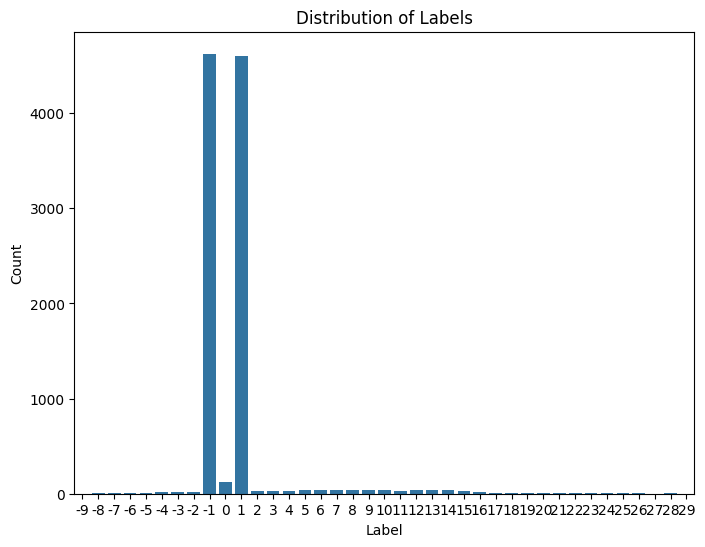


Modified Dataset with New Features:
            Unix       Time Stamp Data Symbol      Open      High       Low  \
19  1.620000e+12  4/19/2021 23:42      BTCUSD  55733.87  55784.29  55727.33   
20  1.620000e+12  4/19/2021 23:41      BTCUSD  55733.44  55733.87  55651.65   
21  1.620000e+12  4/19/2021 23:40      BTCUSD  55709.64  55789.43  55709.64   
22  1.620000e+12  4/19/2021 23:39      BTCUSD  55826.46  55826.46  55709.64   
23  1.620000e+12  4/19/2021 23:38      BTCUSD  55931.36  55931.36  55826.46   

       Close    Volume  SMA5-20    EMA5-20  ...       OBV  Price_Diff  Oc  \
19  55770.34  1.926222  64.1030  45.496860  ...       NaN         NaN   0   
20  55733.87  0.679018  31.8810  22.380050  ... -0.679018      -36.47  -1   
21  55733.44  2.043176   2.8720   7.623718  ... -2.722194       -0.43  -1   
22  55709.64  2.184543  -5.7865  -7.185616  ... -4.906737      -23.80  -1   
23  55826.46  1.157835 -14.8825  11.924170  ... -3.748902      116.82   1   

    Label  Price_Change  

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Dataset Information:")
print(btc_data.info())

print("\nSummary Statistics:")
print(btc_data.describe())

print("\nMissing Values:")
print(btc_data.isnull().sum())

plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=btc_data)
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()



btc_data['Price_Change'] = btc_data['Close'] - btc_data['Open']
btc_data['MACD'] = btc_data['Close'].rolling(window=12).mean() - btc_data['Close'].rolling(window=26).mean()
delta = btc_data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
btc_data['RSI'] = 100 - (100 / (1 + rs))
btc_data['MA20'] = btc_data['Close'].rolling(window=20).mean()
btc_data['20dSTD'] = btc_data['Close'].rolling(window=20).std()
btc_data['UpperBand'] = btc_data['MA20'] + (btc_data['20dSTD'] * 2)
btc_data['LowerBand'] = btc_data['MA20'] - (btc_data['20dSTD'] * 2)
btc_data['Volume_ROC'] = btc_data['Volume'].pct_change()
btc_data['OBV'] = (np.sign(btc_data['Close'].diff()) * btc_data['Volume']).cumsum()

print("\nModified Dataset with New Features:")
print(btc_data.head())


In [6]:
def indicator_function(data):
    # Compute the price difference between consecutive days
    data['Price_Diff'] = data['Close'].diff()
    # Initialize indicator column with 0
    data['Oc'] = 0
    # Set indicator value based on the price difference
    data.loc[data['Price_Diff'] > 0, 'Oc'] = 1
    data.loc[data['Price_Diff'] < 0, 'Oc'] = -1
    return data

btc_data_i = indicator_function(btc_data)
eth_data_i= indicator_function(eth_data)
ltc_data_i= indicator_function(ltc_data)
print(btc_data_i)
print(eth_data_i)
print(ltc_data_i)


              Unix       Time Stamp Data Symbol      Open      High       Low  \
19    1.620000e+12  4/19/2021 23:42      BTCUSD  55733.87  55784.29  55727.33   
20    1.620000e+12  4/19/2021 23:41      BTCUSD  55733.44  55733.87  55651.65   
21    1.620000e+12  4/19/2021 23:40      BTCUSD  55709.64  55789.43  55709.64   
22    1.620000e+12  4/19/2021 23:39      BTCUSD  55826.46  55826.46  55709.64   
23    1.620000e+12  4/19/2021 23:38      BTCUSD  55931.36  55931.36  55826.46   
...            ...              ...         ...       ...       ...       ...   
9995  1.620000e+12   4/13/2021 1:24      BTCUSD  60282.70  60324.21  60282.70   
9996  1.620000e+12   4/13/2021 1:23      BTCUSD  60295.86  60295.86  60280.96   
9997  1.620000e+12   4/13/2021 1:22      BTCUSD  60299.73  60326.55  60288.74   
9998  1.620000e+12   4/13/2021 1:21      BTCUSD  60258.06  60301.34  60258.06   
9999  1.620000e+12   4/13/2021 1:20      BTCUSD  60198.58  60267.01  60178.05   

         Close    Volume  S

In [5]:
def label_dataset(data, k=1, W_min=50, W_max=360):
    labels = []
    for i in range(len(data)):
        label = 0
        # Calculate the historical window size for this sample
        W = min(i + 1, W_max) - max(i - W_max + 1, 0)
        # Check if the current row exists in the dataset
        if i in data.index:
            # Calculate the label for this sample using the indicator function Oc
            label = data['Oc'][i]
            for j in range(1, W):
                # Skip cases where the row does not exist
                if (i - j) not in data.index:
                    continue
                label += k * data['Oc'][i - j]

        labels.append(label)

    data['Label'] = labels

    return data

btc_data = label_dataset(btc_data)
eth_data = label_dataset(eth_data)
ltc_data = label_dataset(ltc_data)


Random Forest Classifier

In [10]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

def apply_random_forest_classifier(data, crypto_name):
    features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA5-20', 'EMA5-20', 'RSI', 'ATR', 'OBV']
    X = data[features]
    y = data['Label']

    X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_eval)

    accuracy = accuracy_score(y_eval, y_pred)
    recall = recall_score(y_eval, y_pred, average='weighted')
    precision = precision_score(y_eval, y_pred, average='weighted')

    print(f"Metrics for {crypto_name} dataset:")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")

print("Bitcoin Dataset:")
apply_random_forest_classifier(btc_data, "Bitcoin")
print("\nEthereum Dataset:")
apply_random_forest_classifier(eth_data, "Ethereum")
print("\nLitecoin Dataset:")
apply_random_forest_classifier(ltc_data, "Litecoin")


Bitcoin Dataset:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for Bitcoin dataset:
Accuracy: 0.486229344016024
Recall: 0.486229344016024
Precision: 0.4893490370513305

Ethereum Dataset:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for Ethereum dataset:
Accuracy: 0.5027541311967952
Recall: 0.5027541311967952
Precision: 0.49518540315757226

Litecoin Dataset:
Metrics for Litecoin dataset:
Accuracy: 0.45818728092138206
Recall: 0.45818728092138206
Precision: 0.4510894477696647


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
binary_labels = btc_data_i['Oc'].apply(lambda x: 1 if x != 0 else 0)
three_class_labels = btc_data_i['Oc']

from sklearn.metrics import accuracy_score
features= ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA5-20', 'EMA5-20', 'RSI', 'ATR', 'OBV']
X=btc_data[features]
X_train_2class, X_eval_2class, y_train_2class, y_eval_2class = train_test_split(X, binary_labels, test_size=0.2, random_state=42)
X_train_3class, X_eval_3class, y_train_3class, y_eval_3class = train_test_split(X, three_class_labels, test_size=0.2, random_state=42)

classifier_2class = RandomForestClassifier(random_state=42)
classifier_3class = RandomForestClassifier(random_state=42)
classifier_2class.fit(X_train_2class, y_train_2class)
classifier_3class.fit(X_train_3class, y_train_3class)

y_pred_2class = classifier_2class.predict(X_eval_2class)
y_pred_3class = classifier_3class.predict(X_eval_3class)

accuracy_2class = accuracy_score(y_eval_2class, y_pred_2class)
accuracy_3class = accuracy_score(y_eval_3class, y_pred_3class)

print("Accuracy for 2-Class Scenario (Overreaction vs. Normal Day):", accuracy_2class)
print("Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day):", accuracy_3class)


Accuracy for 2-Class Scenario (Overreaction vs. Normal Day): 0.9909864797195793
Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day): 0.7701552328492739


In [ ]:
binary_labels_eth = eth_data_i['Oc'].apply(lambda x: 1 if x != 0 else 0)
three_class_labels_eth = eth_data_i['Oc']
binary_labels_ltc = ltc_data_i['Oc'].apply(lambda x: 1 if x != 0 else 0)
three_class_labels_ltc = ltc_data_i['Oc']
features_eth = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA5-20', 'EMA5-20', 'RSI', 'ATR', 'OBV']
features_ltc = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA5-20', 'EMA5-20', 'RSI', 'ATR', 'OBV']

X_eth = eth_data[features_eth]
X_ltc = ltc_data[features_ltc]
from sklearn.metrics import accuracy_score
X_train_2class_eth, X_eval_2class_eth, y_train_2class_eth, y_eval_2class_eth = train_test_split(X_eth, binary_labels_eth, test_size=0.2, random_state=42)
X_train_3class_eth, X_eval_3class_eth, y_train_3class_eth, y_eval_3class_eth = train_test_split(X_eth, three_class_labels_eth, test_size=0.2, random_state=42)
X_train_2class_ltc, X_eval_2class_ltc, y_train_2class_ltc, y_eval_2class_ltc = train_test_split(X_ltc, binary_labels_ltc, test_size=0.2, random_state=42)
X_train_3class_ltc, X_eval_3class_ltc, y_train_3class_ltc, y_eval_3class_ltc = train_test_split(X_ltc, three_class_labels_ltc, test_size=0.2, random_state=42)

classifier_2class_eth = RandomForestClassifier(random_state=42)
classifier_3class_eth = RandomForestClassifier(random_state=42)
classifier_2class_ltc = RandomForestClassifier(random_state=42)
classifier_3class_ltc = RandomForestClassifier(random_state=42)
classifier_2class_eth.fit(X_train_2class_eth, y_train_2class_eth)
classifier_3class_eth.fit(X_train_3class_eth, y_train_3class_eth)
classifier_2class_ltc.fit(X_train_2class_ltc, y_train_2class_ltc)
classifier_3class_ltc.fit(X_train_3class_ltc, y_train_3class_ltc)

# Predicting on evaluation sets for both scenarios
y_pred_2class_eth = classifier_2class_eth.predict(X_eval_2class_eth)
y_pred_3class_eth = classifier_3class_eth.predict(X_eval_3class_eth)
y_pred_2class_ltc = classifier_2class_ltc.predict(X_eval_2class_ltc)
y_pred_3class_ltc = classifier_3class_ltc.predict(X_eval_3class_ltc)

# Calculating accuracy for both scenarios
accuracy_2class_eth = accuracy_score(y_eval_2class_eth, y_pred_2class_eth)
accuracy_3class_eth = accuracy_score(y_eval_3class_eth, y_pred_3class_eth)
accuracy_2class_ltc = accuracy_score(y_eval_2class_ltc, y_pred_2class_ltc)
accuracy_3class_ltc = accuracy_score(y_eval_3class_ltc, y_pred_3class_ltc)

print("Ethereum Dataset:")
print("Accuracy for 2-Class Scenario (Overreaction vs. Normal Day):", accuracy_2class_eth)
print("Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day):", accuracy_3class_eth)

print("\nLitecoin Dataset:")
print("Accuracy for 2-Class Scenario (Overreaction vs. Normal Day):", accuracy_2class_ltc)
print("Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day):", accuracy_3class_ltc)


Ethereum Dataset:
Accuracy for 2-Class Scenario (Overreaction vs. Normal Day): 0.9919879819729595
Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day): 0.7611417125688533

Litecoin Dataset:
Accuracy for 2-Class Scenario (Overreaction vs. Normal Day): 0.8908362543815723
Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day): 0.6820230345518278


KNN-K-NEAREST NEIGHBOURS

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

def apply_knn_classifier(data, crypto_name):
    features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA5-20', 'EMA5-20', 'RSI', 'ATR', 'OBV']
    X = data[features]
    y = data['Label']

    X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_eval)
    accuracy = accuracy_score(y_eval, y_pred)
    recall = recall_score(y_eval, y_pred, average='weighted')
    precision = precision_score(y_eval, y_pred, average='weighted')

    print(f"Metrics for {crypto_name} dataset:")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")

print("Bitcoin Dataset:")
apply_knn_classifier(btc_data, "Bitcoin")


Bitcoin Dataset:
Metrics for Bitcoin dataset:
Accuracy: 0.4441662493740611
Recall: 0.4441662493740611
Precision: 0.43198328233867606


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
binary_labels = btc_data_i['Oc'].apply(lambda x: 1 if x != 0 else 0)
three_class_labels = btc_data_i['Oc']
X=btc_data[features_eth]
X_train_2class, X_eval_2class, y_train_2class, y_eval_2class = train_test_split(X, binary_labels, test_size=0.2, random_state=42)
X_train_3class, X_eval_3class, y_train_3class, y_eval_3class = train_test
knn_classifier_2class = KNeighborsClassifier(n_neighbors=5)
knn_classifier_3class = KNeighborsClassifier(n_neighbors=5)
knn_classifier_2class.fit(X_train_2class, y_train_2class)
knn_classifier_3class.fit(X_train_3class, y_train_3class)

y_pred_2class = knn_classifier_2class.predict(X_eval_2class)
y_pred_3class = knn_classifier_3class.predict(X_eval_3class)

accuracy_2class = accuracy_score(y_eval_2class, y_pred_2class)
accuracy_3class = accuracy_score(y_eval_3class, y_pred_3class)

print("Accuracy for 2-Class Scenario (Overreaction vs. Normal Day) with KNN:", accuracy_2class)
print("Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day) with KNN:", accuracy_3class)


Accuracy for 2-Class Scenario (Overreaction vs. Normal Day) with KNN: 0.9919879819729595
Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day) with KNN: 0.513770655983976


In [ ]:

X_train_2class_eth, X_eval_2class_eth, y_train_2class_eth, y_eval_2class_eth = train_test_split(X_eth, binary_labels_eth, test_size=0.2, random_state=42)
X_train_3class_eth, X_eval_3class_eth, y_train_3class_eth, y_eval_3class_eth = train_test_split(X_eth, three_class_labels_eth, test_size=0.2, random_state=42)
X_train_2class_ltc, X_eval_2class_ltc, y_train_2class_ltc, y_eval_2class_ltc = train_test_split(X_ltc, binary_labels_ltc, test_size=0.2, random_state=42)
X_train_3class_ltc, X_eval_3class_ltc, y_train_3class_ltc, y_eval_3class_ltc = train_test_split(X_ltc, three_class_labels_ltc, test_size=0.2, random_state=42)

knn_classifier_2class_eth = KNeighborsClassifier(n_neighbors=5)
knn_classifier_3class_eth = KNeighborsClassifier(n_neighbors=5)
knn_classifier_2class_ltc = KNeighborsClassifier(n_neighbors=5)
knn_classifier_3class_ltc = KNeighborsClassifier(n_neighbors=5)
knn_classifier_2class_eth.fit(X_train_2class_eth, y_train_2class_eth)
knn_classifier_3class_eth.fit(X_train_3class_eth, y_train_3class_eth)
knn_classifier_2class_ltc.fit(X_train_2class_ltc, y_train_2class_ltc)
knn_classifier_3class_ltc.fit(X_train_3class_ltc, y_train_3class_ltc)

y_pred_2class_eth = knn_classifier_2class_eth.predict(X_eval_2class_eth)
y_pred_3class_eth = knn_classifier_3class_eth.predict(X_eval_3class_eth)
y_pred_2class_ltc = knn_classifier_2class_ltc.predict(X_eval_2class_ltc)
y_pred_3class_ltc = knn_classifier_3class_ltc.predict(X_eval_3class_ltc)

accuracy_2class_eth = accuracy_score(y_eval_2class_eth, y_pred_2class_eth)
accuracy_3class_eth = accuracy_score(y_eval_3class_eth, y_pred_3class_eth)
accuracy_2class_ltc = accuracy_score(y_eval_2class_ltc, y_pred_2class_ltc)
accuracy_3class_ltc = accuracy_score(y_eval_3class_ltc, y_pred_3class_ltc)

print("Ethereum Dataset:")
print("Accuracy for 2-Class Scenario (Overreaction vs. Normal Day) with KNN:", accuracy_2class_eth)
print("Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day) with KNN:", accuracy_3class_eth)

print("\nLitecoin Dataset:")
print("Accuracy for 2-Class Scenario (Overreaction vs. Normal Day) with KNN:", accuracy_2class_ltc)
print("Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day) with KNN:", accuracy_3class_ltc)


Ethereum Dataset:
Accuracy for 2-Class Scenario (Overreaction vs. Normal Day) with KNN: 0.9919879819729595
Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day) with KNN: 0.528793189784677

Litecoin Dataset:
Accuracy for 2-Class Scenario (Overreaction vs. Normal Day) with KNN: 0.8818227341011518
Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day) with KNN: 0.4752128192288433


SVC

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score

def apply_svc_classifier(data, crypto_name):
    features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA5-20', 'EMA5-20', 'RSI', 'ATR', 'OBV']
    X = data[features]
    y = data['Label']

    X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

    classifier = SVC(kernel='linear', random_state=42)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_eval)

    accuracy = accuracy_score(y_eval, y_pred)
    recall = recall_score(y_eval, y_pred, average='weighted')
    precision = precision_score(y_eval, y_pred, average='weighted')

    print(f"Accuracy for {crypto_name} Dataset with SVC:", accuracy)
    print(f"Recall for {crypto_name} Dataset with SVC:", recall)
    print(f"Precision for {crypto_name} Dataset with SVC:", precision)

print("Bitcoin Dataset:")
apply_svc_classifier(btc_data, "Bitcoin")


Bitcoin Dataset:
Accuracy for Bitcoin Dataset with SVC: 0.5448172258387581
Recall for Bitcoin Dataset with SVC: 0.5448172258387581
Precision for Bitcoin Dataset with SVC: 0.5330302217718087


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

binary_labels = btc_data_i['Oc'].apply(lambda x: 1 if x != 0 else 0)
three_class_labels = btc_data_i['Oc']

X_train_2class, X_eval_2class, y_train_2class, y_eval_2class = train_test_split(X, binary_labels, test_size=0.2, random_state=42)
X_train_3class, X_eval_3class, y_train_3class, y_eval_3class = train_test_split(X, three_class_labels, test_size=0.2, random_state=42)

# Initializing and training SVC classifiers for both scenarios
svc_classifier_2class = SVC(kernel='linear', random_state=42)
svc_classifier_3class = SVC(kernel='linear', random_state=42)
svc_classifier_2class.fit(X_train_2class, y_train_2class)
svc_classifier_3class.fit(X_train_3class, y_train_3class)

y_pred_2class = svc_classifier_2class.predict(X_eval_2class)
y_pred_3class = svc_classifier_3class.predict(X_eval_3class)

accuracy_2class = accuracy_score(y_eval_2class, y_pred_2class)
accuracy_3class = accuracy_score(y_eval_3class, y_pred_3class)

print("Accuracy for 2-Class Scenario (Overreaction vs. Normal Day) with SVC:", accuracy_2class)
print("Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day) with SVC:", accuracy_3class)


Multinomial Naive Bayes

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA5-20', 'EMA5-20', 'RSI', 'ATR', 'OBV']
X = btc_data[features]
y = btc_data_i['Label']
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)

# Preprocess labels to ensure they are non-negative
y_train_preprocessed = y_train + 1
y_eval_preprocessed = y_eval + 1
# Initialize and train Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_scaled, y_train_preprocessed)

# Predict on evaluation set
y_pred = nb_classifier.predict(X_eval_scaled)

y_pred_original = y_pred - 1
accuracy = accuracy_score(y_eval, y_pred_original)
precision = precision_score(y_eval, y_pred_original, average='weighted')
recall = recall_score(y_eval, y_pred_original, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.4767150726089134
Precision: 0.44960293298804666
Recall: 0.4767150726089134


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

binary_labels_2class = btc_data_i['Oc'].apply(lambda x: 1 if x != 0 else 0)

X_train_2class, X_eval_2class, y_train_2class, y_eval_2class = train_test_split(X, binary_labels_2class, test_size=0.2, random_state=42)

svc_classifier_2class = SVC(kernel='linear', random_state=42)
svc_classifier_2class.fit(X_train_2class, y_train_2class)
y_pred_2class = svc_classifier_2class.predict(X_eval_2class)

accuracy_2class = accuracy_score(y_eval_2class, y_pred_2class)

print("Accuracy for 2-Class Scenario (Overreaction vs. Normal Day) with SVC:", accuracy_2class)


three_class_labels = btc_data_i['Oc']

X_train_3class, X_eval_3class, y_train_3class, y_eval_3class = train_test_split(X, three_class_labels, test_size=0.2, random_state=42)

svc_classifier_3class = SVC(kernel='linear', random_state=42)
svc_classifier_3class.fit(X_train_3class, y_train_3class)

y_pred_3class = svc_classifier_3class.predict(X_eval_3class)

accuracy_3class = accuracy_score(y_eval_3class, y_pred_3class)

print("Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day) with SVC:", accuracy_3class)


Accuracy for 2-Class Scenario (Overreaction vs. Normal Day) with SVC: 0.9924887330996495
Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day) with SVC: 0.6695042563845769


Multi-Layer Perceptron (MLP)

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA5-20', 'EMA5-20', 'RSI', 'ATR', 'OBV']
X = btc_data[features]
y = btc_data['Label']

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)

mlp_classifier = MLPClassifier(random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)

y_pred = mlp_classifier.predict(X_eval_scaled)
accuracy = accuracy_score(y_eval, y_pred)

precision = precision_score(y_eval, y_pred, average='weighted')

recall = recall_score(y_eval, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.4767150726089134
Precision: 0.44960293298804666
Recall: 0.4767150726089134


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

binary_labels_2class = btc_data_i['Oc'].apply(lambda x: 1 if x != 0 else 0)

X_train_2class, X_eval_2class, y_train_2class, y_eval_2class = train_test_split(X, binary_labels_2class, test_size=0.2, random_state=42)

mlp_classifier_2class = MLPClassifier(random_state=42)
mlp_classifier_2class.fit(X_train_2class, y_train_2class)

y_pred_2class = mlp_classifier_2class.predict(X_eval_2class)

accuracy_2class = accuracy_score(y_eval_2class, y_pred_2class)

print("Accuracy for 2-Class Scenario (Overreaction vs. Normal Day) with MLP:", accuracy_2class)


# Adjusting the target variable for the 3-class scenario based on Oc indicator labels
three_class_labels = btc_data_i['Oc']

# Splitting the dataset into training and evaluation sets for the 3-class scenario
X_train_3class, X_eval_3class, y_train_3class, y_eval_3class = train_test_split(X, three_class_labels, test_size=0.2, random_state=42)
mlp_classifier_3class = MLPClassifier(random_state=42)
mlp_classifier_3class.fit(X_train_3class, y_train_3class)

y_pred_3class = mlp_classifier_3class.predict(X_eval_3class)

accuracy_3class = accuracy_score(y_eval_3class, y_pred_3class)

print("Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day) with MLP:", accuracy_3class)


Accuracy for 2-Class Scenario (Overreaction vs. Normal Day) with MLP: 0.9924887330996495
Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day) with MLP: 0.5728592889334001


Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

X_train_multiclass, X_eval_multiclass, y_train_multiclass, y_eval_multiclass = train_test_split(X,
lg_classifier_multiclass = LogisticRegression(random_state=42)
lg_classifier_multiclass.fit(X_train_multiclass, y_train_multiclass)

y_pred_multiclass = lg_classifier_multiclass.predict(X_eval_multiclass)

accuracy_multiclass = accuracy_score(y_eval_multiclass, y_pred_multiclass)

precision_multiclass = precision_score(y_eval_multiclass, y_pred_multiclass, average='weighted')

recall_multiclass = recall_score(y_eval_multiclass, y_pred_multiclass, average='weighted')

print("Accuracy for Multiclass Classification Scenario:", accuracy_multiclass)
print("Precision for Multiclass Classification Scenario:", precision_multiclass)
print("Recall for Multiclass Classification Scenario:", recall_multiclass)


Accuracy for Multiclass Classification Scenario: 0.4656985478217326
Precision for Multiclass Classification Scenario: 0.4345088141141433
Recall for Multiclass Classification Scenario: 0.4656985478217326


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

binary_labels_2class = btc_data_i['Oc'].apply(lambda x: 1 if x != 0 else 0)

X_train_2class, X_eval_2class, y_train_2class, y_eval_2class = train_test_split(X, binary_labels_2class, test_size=0.2, random_state=42)

lg_classifier_2class = LogisticRegression(random_state=42)
lg_classifier_2class.fit(X_train_2class, y_train_2class)

y_pred_2class = lg_classifier_2class.predict(X_eval_2class)

accuracy_2class = accuracy_score(y_eval_2class, y_pred_2class)

print("Accuracy for 2-Class Scenario (Overreaction vs. Normal Day) with LG Classifier:", accuracy_2class)


three_class_labels = btc_data_i['Oc']
X_train_3class, X_eval_3class, y_train_3class, y_eval_3class = train_test_split(X, three_class_labels, test_size=0.2, random_state=42)

lg_classifier_3class = LogisticRegression(random_state=42)
lg_classifier_3class.fit(X_train_3class, y_train_3class)

y_pred_3class = lg_classifier_3class.predict(X_eval_3class)

accuracy_3class = accuracy_score(y_eval_3class, y_pred_3class)

print("Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day) with LG Classifier:", accuracy_3class)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for 2-Class Scenario (Overreaction vs. Normal Day) with LG Classifier: 0.9924887330996495
Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day) with LG Classifier: 0.6124186279419128


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GNB

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

X_train_binary, X_eval_binary, y_train_binary, y_eval_binary = train_test_split(X, y, test_size=0.2, random_state=42)

gnb_classifier_binary = GaussianNB()
gnb_classifier_binary.fit(X_train_binary, y_train_binary)

y_pred_binary = gnb_classifier_binary.predict(X_eval_binary)

accuracy_binary = accuracy_score(y_eval_binary, y_pred_binary)

precision_binary = precision_score(y_eval_binary, y_pred_binary, average='weighted')

recall_binary = recall_score(y_eval_binary, y_pred_binary, average='weighted')

print("Accuracy with GNB Classifier:", accuracy_binary)
print("Precision with GNB Classifier:", precision_binary)
print("Recall with GNB Classifier:", recall_binary)


Accuracy with GNB Classifier: 0.3660490736104156
Precision with GNB Classifier: 0.4217416675225088
Recall with GNB Classifier: 0.3660490736104156


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

binary_labels = btc_data_i['Oc'].apply(lambda x: 1 if x != 0 else 0)

X_train_2class, X_eval_2class, y_train_2class, y_eval_2class = train_test_split(X, binary_labels, test_size=0.2, random_state=42)

gnb_classifier_2class = GaussianNB()
gnb_classifier_2class.fit(X_train_2class, y_train_2class)

y_pred_2class = gnb_classifier_2class.predict(X_eval_2class)

accuracy_2class = accuracy_score(y_eval_2class, y_pred_2class)

print("Accuracy for 2-Class Scenario (Normal Day vs. Overreaction) with GNB Classifier:", accuracy_2class)


Accuracy for 2-Class Scenario (Normal Day vs. Overreaction) with GNB Classifier: 0.8983475212819229


In [ ]:

three_class_labels = btc_data_i['Oc']

X_train_3class, X_eval_3class, y_train_3class, y_eval_3class = train_test_split(X, three_class_labels, test_size=0.2, random_state=42)

# Initializing and training Gaussian Naive Bayes classifier for the 3-class classification scenario
gnb_classifier_3class = GaussianNB()
gnb_classifier_3class.fit(X_train_3class, y_train_3class)

y_pred_3class = gnb_classifier_3class.predict(X_eval_3class)

accuracy_3class = accuracy_score(y_eval_3class, y_pred_3class)

print("Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day) with GNB Classifier:", accuracy_3class)


Accuracy for 3-Class Scenario (Positive Overreaction, Negative Overreaction, Normal Day) with GNB Classifier: 0.5307961942914372


HE


In [27]:
import numpy as np
from sklearn.metrics import precision_score, recall_score


# Step 1: Calculate daily returns
def calculate_daily_returns(open_prices, close_prices):
    returns = ((close_prices / open_prices) - 1) * 100
    return returns

# Step 2: Divide returns into positive and negative datasets
def split_returns(returns):
    positive_returns = returns[returns > 0]
    negative_returns = returns[returns < 0]
    return positive_returns, negative_returns

# Step 3: Compute average daily return and standard deviation
def compute_statistics(returns):
    average_return = np.mean(returns)
    std_dev = np.std(returns)
    return average_return, std_dev

# Step 4: Define thresholds for positive and negative overreaction
def define_thresholds(average_return, std_dev, k):
    positive_threshold = average_return + k * std_dev
    negative_threshold = average_return - k * std_dev
    return positive_threshold, negative_threshold

open_prices = btc_data['Open'].values
close_prices = btc_data['Close'].values

returns = calculate_daily_returns(open_prices[:-1], close_prices[1:])
positive_returns, negative_returns = split_returns(returns)

average_return_pos, std_dev_pos = compute_statistics(positive_returns)
average_return_neg, std_dev_neg = compute_statistics(negative_returns)

k = 1  # Number of standard deviations
positive_threshold, negative_threshold = define_thresholds(average_return_pos, std_dev_pos, k)

print("Positive threshold:", positive_threshold)
print("Negative threshold:", negative_threshold)
def label_days(open_prices, close_prices, positive_threshold, negative_threshold):
    returns = calculate_daily_returns(open_prices[:-1], close_prices[1:])  # Exclude last day's open and first day's close
    labels = np.zeros(len(returns), dtype=int)  # Initialize labels array

    for i, ret in enumerate(returns):
        if ret > positive_threshold:
            labels[i] = 1  # Positive overreaction
        elif ret < negative_threshold:
            labels[i] = -1  # Negative overreaction

    return labels
labels = label_days(open_prices, close_prices, positive_threshold, negative_threshold)
def calculate_accuracy(labels, ground_truth_labels):
    correct_predictions = np.sum(labels == ground_truth_labels)
    total_predictions = len(labels)
    accuracy = correct_predictions / total_predictions
    return accuracy
ground_truth_labels = btc_data['Oc'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0)).values
ground_truth_labels = ground_truth_labels[1:]
accuracy = calculate_accuracy(labels, ground_truth_labels)
print("Accuracy:", accuracy)
precision = precision_score(ground_truth_labels, labels, labels=[1, -1], average='macro')
recall = recall_score(ground_truth_labels, labels, labels=[1, -1], average='macro')
print("Precision:", precision)
print("Recall:", recall)


Positive threshold: 0.016209237559183798
Negative threshold: 0.016209237559183798
Accuracy: 0.49519038076152305
Precision: 0.24762000200420883
Recall: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
